# Análise Exploratória de Dados do S&P 500

## Introdução

Este notebook tem como objetivo realizar uma **Análise Exploratória de Dados (EDA)** utilizando dados das empresas que compõem o índice **S&P 500**. A análise exploratória é uma etapa essencial para compreender as características dos dados, identificar padrões, tendências, outliers, e obter insights valiosos que podem guiar decisões de negócios e modelos preditivos.

## Objetivos

Neste trabalho, vamos explorar os seguintes aspectos dos dados:

1. **Análise Descritiva Geral**:
   - Estatísticas descritivas para variáveis como preço das ações, capitalização de mercado, crescimento de receita e outros indicadores financeiros.
   
2. **Análise por Setor**:
   - Comparação dos setores presentes no S&P 500, incluindo distribuições de capitalização de mercado, volume negociado, e preços das ações.
   
3. **Análise Temporal**:
   - Visualização da evolução do volume de negociação e dos preços das ações ao longo do tempo.

4. **Correlação e Padrões**:
   - Identificação de correlações entre diferentes variáveis financeiras e comportamentais, como preço das ações e volume negociado.

## Conjunto de Dados

Os dados utilizados para esta análise foram obtidos a partir de uma base pública disponível no Kaggle. Eles incluem:

- **sp500_companies.csv**: Contém informações detalhadas sobre as empresas que compõem o índice S&P 500, como preço das ações, capitalização de mercado, setor e outros indicadores financeiros.
- **sp500_stocks.csv**: Dados históricos sobre preços de ações e volumes negociados diariamente.
- **sp500_index.csv**: Informações sobre o índice S&P 500 ao longo do tempo.

## Metodologia

As análises serão conduzidas utilizando a linguagem Python e suas bibliotecas populares para análise de dados, como **pandas**, **matplotlib**, e **seaborn**. Visualizações gráficas serão geradas para facilitar a interpretação dos resultados.

## Estrutura do Notebook

1. **Importação e Limpeza dos Dados**
2. **Análise Descritiva Geral**
3. **Análise por Setor**
4. **Análise Temporal**
5. **Conclusão**

Este estudo tem como foco oferecer insights sobre o desempenho e as características das empresas que compõem o S&P 500, utilizando técnicas exploratórias que auxiliam na melhor compreensão do comportamento do mercado de ações.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [3]:

df_companies = pd.read_csv(r'data/sp500_companies.csv', delimiter = ',')
df_index = pd.read_csv(r'data/sp500_index.csv', delimiter = ',')
df_stocks = pd.read_csv(r'data/sp500_stocks.csv', delimiter = ',')

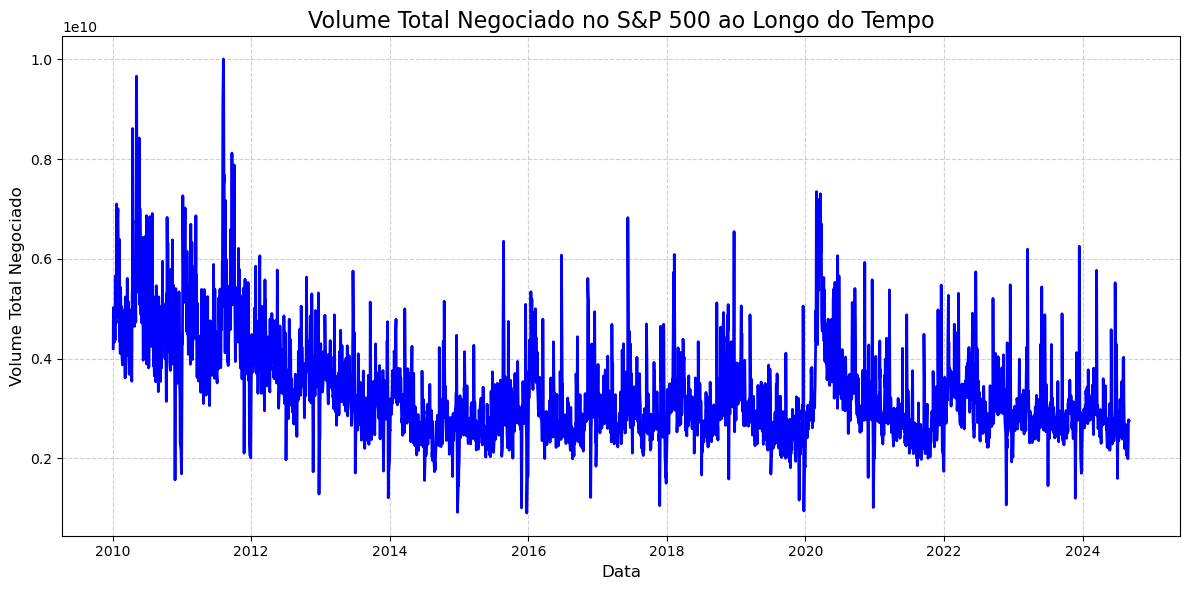

In [10]:
volume_by_date = df_stocks.groupby('Date')['Volume'].sum().reset_index()


plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(volume_by_date['Date']), volume_by_date['Volume'], color='blue', linewidth=2)
plt.title('Volume Total Negociado no S&P 500 ao Longo do Tempo', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Volume Total Negociado', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [4]:
df_companies.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,222.77,3387017396224,1.317810e+11,0.049,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.066001
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,409.44,3043383836672,1.294330e+11,0.152,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.059304
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,108.00,2649240109056,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.051624
3,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,157.36,1946401505280,1.154780e+11,0.136,Mountain View,CA,United States,179582.0,Alphabet Inc. offers various products and plat...,0.037928
4,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,158.61,1941307129856,1.154780e+11,0.136,Mountain View,CA,United States,179582.0,Alphabet Inc. offers various products and plat...,0.037829


In [5]:
sector_grouped = df_companies.groupby('Sector').agg({
    'Symbol': 'count',  
    'Marketcap': 'sum',  
    'Weight': 'mean',  
    'Currentprice': 'mean',  
    'Revenuegrowth': 'mean' 
}).reset_index()

In [7]:
sector_grouped.columns = ['Sector', 'Number of Companies', 'Total Market Cap', 'Average Weight', 'Average Stock Price', 'Average Revenue Growth']
sector_grouped.head()

,Sector,Number of Companies,Total Market Cap,Average Weight,Average Stock Price,Average Revenue Growth
0,Basic Materials,22,947154449408,0.000839,157.597273,-0.002409
1,Communication Services,22,6619297869824,0.005863,134.516818,0.035455
2,Consumer Cyclical,57,5035292662784,0.001721,433.816491,0.039877
3,Consumer Defensive,37,3290024208384,0.001733,111.938378,0.002270
4,Energy,22,1660355813376,0.001471,85.936818,0.116136


/Users/jose/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jose/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jose/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jose/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

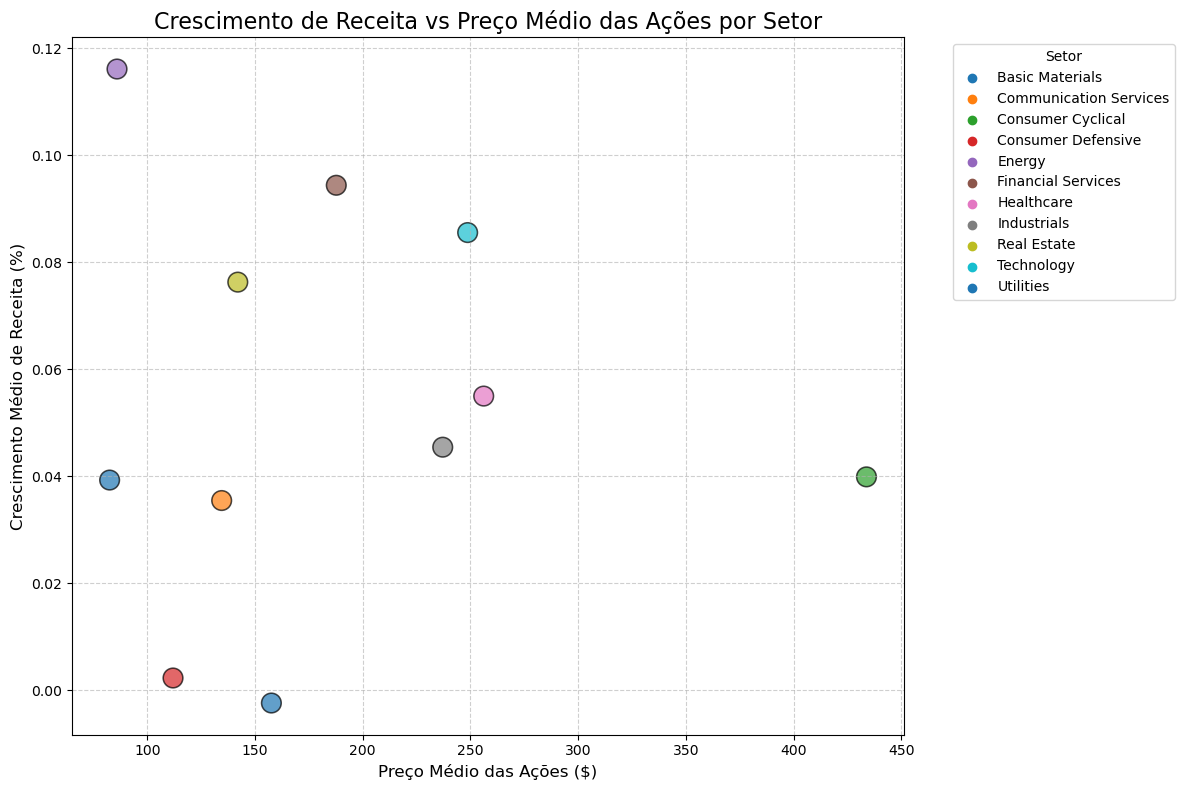

In [8]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=sector_grouped, x='Average Stock Price', y='Average Revenue Growth', 
                hue='Sector', palette='tab10', s=200, edgecolor='black', alpha=0.7)

plt.title('Crescimento de Receita vs Preço Médio das Ações por Setor', fontsize=16)
plt.xlabel('Preço Médio das Ações ($)', fontsize=12)
plt.ylabel('Crescimento Médio de Receita (%)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(title='Setor', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


/Users/jose/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jose/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jose/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jose/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

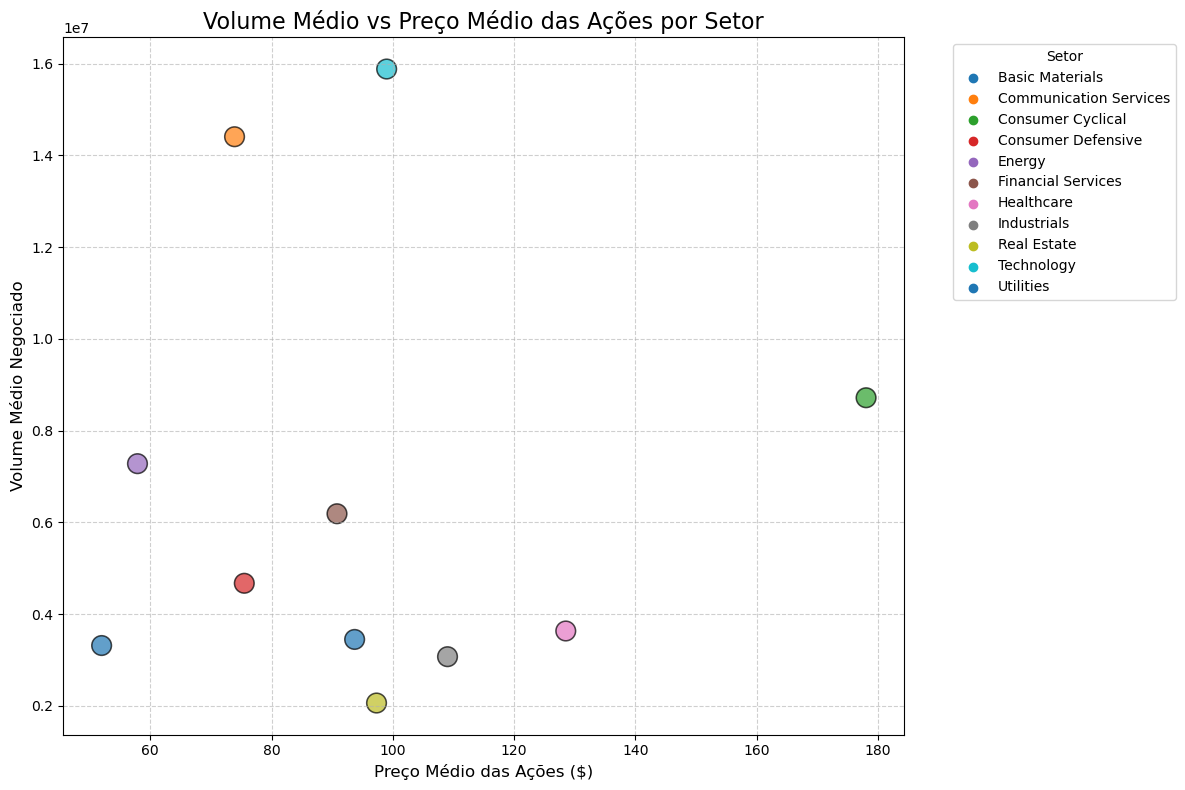

In [11]:
merged_df = pd.merge(df_stocks, df_companies[['Symbol', 'Sector']], on='Symbol', how='left')


sector_volume_price = merged_df.groupby('Sector').agg({
    'Volume': 'mean',  
    'Close': 'mean'    
}).reset_index()


plt.figure(figsize=(12, 8))


sns.scatterplot(data=sector_volume_price, x='Close', y='Volume', hue='Sector', palette='tab10', s=200, edgecolor='black', alpha=0.7)

plt.title('Volume Médio vs Preço Médio das Ações por Setor', fontsize=16)
plt.xlabel('Preço Médio das Ações ($)', fontsize=12)
plt.ylabel('Volume Médio Negociado', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(title='Setor', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [12]:
top_3_companies = df_companies[['Symbol', 'Shortname', 'Marketcap']].sort_values(by='Marketcap', ascending=False).head(3)

top_3_companies

,Symbol,Shortname,Marketcap
0,AAPL,Apple Inc.,3387017396224
1,MSFT,Microsoft Corporation,3043383836672
2,NVDA,NVIDIA Corporation,2649240109056


## Conclusão

Nesta análise exploratória de dados (EDA) sobre as empresas do **S&P 500**, pudemos identificar diversos insights relevantes a partir dos dados financeiros e históricos. Através de uma série de análises descritivas e visuais, foi possível compreender melhor o comportamento do mercado e as características das empresas que compõem este índice de referência.

### Principais Conclusões:

1. **Análise Geral e Setorial**:
   - Observamos variações significativas nos preços das ações e na capitalização de mercado entre os diferentes setores da economia. Setores como **Tecnologia** e **Serviços de Comunicação** apresentaram as maiores valorizações de mercado, enquanto setores como **Energia** e **Materiais Básicos** mostraram uma volatilidade maior nos preços das ações.
   
2. **Volume Negociado**:
   - A análise de volumetria destacou padrões de negociação ao longo do tempo, com certos setores e empresas apresentando volumes significativamente mais altos em momentos específicos. Isso pode estar relacionado a eventos de mercado, resultados financeiros, ou notícias que impactaram os investidores.

3. **Correlação entre Indicadores**:
   - Foi possível identificar correlações entre variáveis como **preço das ações** e **volume negociado**, além de explorar o impacto do crescimento de receita em diferentes setores. Esses padrões sugerem que setores mais valorizados tendem a manter volumes de negociação elevados e consistentes ao longo do tempo.

4. **Evolução Temporal**:
   - A análise da evolução temporal dos preços e volumes demonstrou que o mercado de ações apresenta ciclos claros de alta e baixa, refletindo momentos de crescimento econômico e crises. Empresas líderes de mercado como **Apple**, **Microsoft**, e **NVIDIA** foram destaques tanto em termos de crescimento quanto de consistência em suas performances.

### Próximos Passos:

Com base nos insights obtidos, futuras análises podem ser conduzidas para explorar tendências mais específicas, como prever a evolução de preços com base em modelos de séries temporais ou identificar comportamentos de outliers em períodos de crise. Além disso, uma análise mais profunda de setores com menor valorização pode trazer informações sobre possíveis oportunidades de investimento ou reestruturações empresariais.

Esta análise exploratória forneceu uma base sólida para o entendimento do mercado de ações do S&P 500 e destaca a importância de continuar monitorando indicadores-chave para auxiliar na tomada de decisões informadas.